### Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import sys
sys.path.append(r'../func')
import combine_obj
import export_obj

### Load necessary data from csv as dataframe

In [2]:
movie_df = pd.read_csv('..\Harry Potter-20220610T024151Z-001\Movies.csv', sep=',', quotechar='"')
movie_df.head(2)

,Movie ID,Movie Title,Release Year,Runtime,Budget,Box Office
0,1,Harry Potter and the Philosopher's Stone,2001,152,"$125,000,000","$1,002,000,000"
1,2,Harry Potter and the Chamber of Secrets,2002,161,"$100,000,000","$880,300,000"


In [3]:
chapter_df = pd.read_csv('..\Harry Potter-20220610T024151Z-001\Chapters.csv', sep=',', quotechar='"', encoding='Latin-1')
chapter_df.head(2)

,Chapter ID,Chapter Name,Movie ID,Movie Chapter
0,1,Doorstep Delivery,1,1
1,2,The Vanishing Glass,1,2


In [4]:
dialogue_df = pd.read_csv('..\Harry Potter-20220610T024151Z-001\Dialogue.csv', sep=',', quotechar='"', encoding='Latin-1')
dialogue_df.head(2)

,Dialogue ID,Chapter ID,Place ID,Character ID,Dialogue
0,1,1,8,4,I should have known that you would be here...P...
1,2,1,8,7,"Good evening, Professor Dumbledore. Are the ru..."


### Analyze

#### Generate basic data

In [5]:
dialogue_chapter_df = dialogue_df.merge(chapter_df, how='left' ,left_on='Chapter ID', right_on='Chapter ID')
dialogue_chapter_df.head(2)

,Dialogue ID,Chapter ID,Place ID,Character ID,Dialogue,Chapter Name,Movie ID,Movie Chapter
0,1,1,8,4,I should have known that you would be here...P...,Doorstep Delivery,1,1
1,2,1,8,7,"Good evening, Professor Dumbledore. Are the ru...",Doorstep Delivery,1,1


#### Dialogue count by each movie

In [6]:
groupBy_movie_df = dialogue_chapter_df.groupby(['Movie ID'])['Movie ID'].count().reset_index(name='Dialogue count')
groupBy_movie_df = groupBy_movie_df.merge(movie_df, how='left' ,left_on='Movie ID', right_on='Movie ID')
groupBy_movie_df.head(5)

,Movie ID,Dialogue count,Movie Title,Release Year,Runtime,Budget,Box Office
0,1,885,Harry Potter and the Philosopher's Stone,2001,152,"$125,000,000","$1,002,000,000"
1,2,986,Harry Potter and the Chamber of Secrets,2002,161,"$100,000,000","$880,300,000"
2,3,881,Harry Potter and the Prisoner of Azkaban,2004,142,"$130,000,000","$796,700,000"
3,4,741,Harry Potter and the Goblet of Fire,2005,157,"$150,000,000","$896,400,000"
4,5,1157,Harry Potter and the Order of the Phoenix,2007,138,"$150,000,000","$942,000,000"


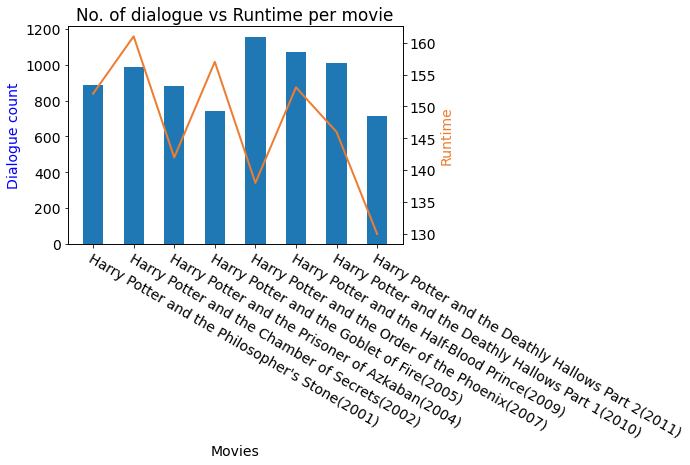

In [7]:
plt.rcParams.update({'font.size': 14})
# prepare chart data
chart_title = 'No. of dialogue vs Runtime per movie'
x_label = 'Movies'
x = combine_obj.combine_2_series(groupBy_movie_df['Movie Title'], groupBy_movie_df['Release Year'])
y1_label = 'Dialogue count'
y1 = groupBy_movie_df['Dialogue count']
y2_label = 'Runtime'
y2 = groupBy_movie_df['Runtime']
# create figure
fig, ax1 = plt.subplots()
ax1.set_title(chart_title)
# 1st plot
ax1.bar(x, y1, width=0.5)
# set xticks rotation before creating ax2
plt.xticks(rotation=330, ha='left', rotation_mode='anchor')
# 2nd plot
ax2 = ax1.twinx()
ax2.plot(x, y2, color='#ED7D31', linewidth=2)
# add axie label name
ax1.set_xlabel(x_label)
ax1.set_ylabel(y1_label, color='b')
ax2.set_ylabel(y2_label, color='#ED7D31')
plt.show()

In [8]:
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Bar(x=x, y=y1, name=y1_label, width=.35),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(
        x=x, 
        y=y2, 
        name=y2_label, 
        marker=dict(
            color='#ED7D31',
            size=15,
        )
    ),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text=chart_title,
    # legend_title="Note",
    xaxis_title="<b>{}</b>".format(x_label),
    font=dict(size=14)
)

# Set y-axes titles
fig.update_yaxes(title_text="<b style='color:blue'>{}</b>".format(y1_label), secondary_y=False)
fig.update_yaxes(title_text="<b style='color:#ED7D31'>{}</b>".format(y2_label), secondary_y=True)

fig.show()

In [9]:
export_obj.export_chart_to_html(fig, 600, '../docs/file.html', describtion_list=['1', '2', '3'], insight_list=['4', '5', '6'])

#### Dialogue count by each chapter per movie

In [10]:
groupBy_chapter_df = dialogue_chapter_df.groupby(['Chapter ID', 'Movie ID'])['Movie ID'].count().reset_index(name='Dialogue count')
groupBy_chapter_df = groupBy_chapter_df.merge(movie_df, how='left' ,left_on='Movie ID', right_on='Movie ID')
print(len(groupBy_chapter_df)) 
groupBy_chapter_df.head(2)

234


,Chapter ID,Movie ID,Dialogue count,Movie Title,Release Year,Runtime,Budget,Box Office
0,1,1,16,Harry Potter and the Philosopher's Stone,2001,152,"$125,000,000","$1,002,000,000"
1,2,1,33,Harry Potter and the Philosopher's Stone,2001,152,"$125,000,000","$1,002,000,000"
